## First Project Python using Pandas library (20-05-2022)

# Sales Analysis 

In [1]:
import pandas as pd

import os

## merging all excel csv file into one

In [2]:
df=pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files=[file for file in os.listdir("./Sales_Data")]

for file in files:
    print(file)


# df.head()

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
all_months_data=pd.DataFrame()  ## created all empty dataframe

## append all file into empty dataframe

for file in files:
    df=pd.read_csv('./Sales_Data/'+file)
    all_months_data=pd.concat([all_months_data,df])
    
# all_months_data.to_csv("all_data.csv",index=False) ##Ready for one files

all_data=pd.read_csv("all_data.csv")

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Qn-1 :- What was the best month for sales? How much was earned that month

### Before jump to the first qn we have do Augment data with additional columns


### Adding Month column

### Clean up date

In [4]:
## Find out where is NAN 

# all_data.isnull().sum() 
# all_data.isnull().mean()

nan_df = all_data[all_data.isna().any(axis=1)]

all_data=all_data.dropna(how='all')

# all_data.head()

nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
## Find Error 2 and solve it

#temp_data=all_data[all_data['Order Date'].str[0:2]=="Or"] ## finding "Or"

all_data=all_data[all_data['Order Date'].str[0:2]!="Or"]


In [6]:
all_data['Month']=all_data['Order Date'].str[0:2]  ## getting the first 2 digit from order date

all_data['Month']=all_data['Month'].astype('int32') ## Converting Month int from string

##  we are getting error right.. Why because we have null value data so we have to remove null first

# Error:-- invalid literal for int() with base 10: 'Or'

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### converting column to the correct type

In [7]:
all_data["Quantity Ordered"]=pd.to_numeric(all_data['Quantity Ordered'])  ## convert into INt
all_data["Price Each"]=pd.to_numeric(all_data['Price Each']) ## convert into float

### Adding Sales Column

In [8]:
all_data['Sales']=all_data["Quantity Ordered"]*all_data["Price Each"]

all_data.head()

# all_data["Quantity Ordered"]  ## convert into INt
# all_data["Price Each"] ## convert into float


# Error TypeError: can't multiply sequence by non-int of type 'str'

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Q1. Solution


In [9]:
q1=all_data.groupby('Month').sum()

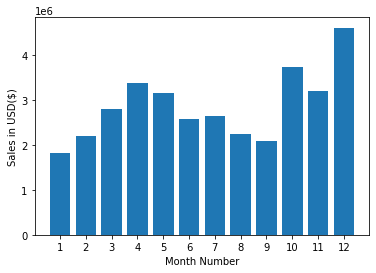

In [10]:
import matplotlib.pyplot as plt
month=range(1,13)
plt.bar(month,q1['Sales'])

plt.xticks(month)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month Number')

plt.show()

In [11]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Q2 --What city had the highest number of sales?

### augment city column ... USing .apply() method

In [12]:
# all_data=all_data.drop(columns="Column name")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['city']=all_data['Purchase Address'].apply(lambda x:x.split(",")[1]+" ("+get_state(x)+")")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [13]:
q2=all_data.groupby('city').sum()
q2

,Quantity Ordered,Price Each,Month,Sales
city,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


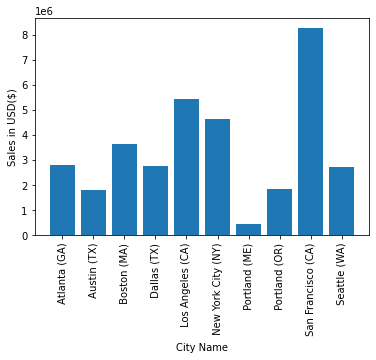

In [14]:
cities=[city for city,all_data in all_data.groupby('city')]

plt.bar(cities,q2['Sales'])

plt.xticks(cities,rotation='vertical',size=10)
plt.ylabel('Sales in USD($)')
plt.xlabel('City Name')

plt.show()

# Q3 - What time should we display advertisemet s to maximize likehood of customer's buying product ? 

In [15]:
### convert ordar date column into complate date format

all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


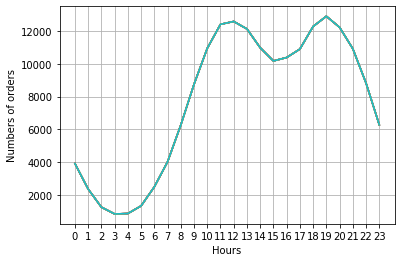

In [16]:
hours = [hour for hour,df in all_data.groupby('Hour')]

plt.plot(hours,all_data.groupby(['Hour']).count())

plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("Numbers of orders")

plt.grid()

plt.show()

## around 11 to 12 Am or 7 pm is good time getting orders 

# Q4- What products are most often sold together ?

In [17]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))
df=df[['Order ID','grouped']].drop_duplicates()

df.head(10)


C:\Users\ketul\AppData\Local\Temp\ipykernel_15760\1656901238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))


,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [18]:
# for i in range(0,len(df['grouped'])):
#     cnt=0
#     for j in range(i+1,len(df['grouped'])):
#         if df['grouped'].iloc[i]==df['grouped'].iloc[j]:
#             cnt+=1
#     print(df['grouped'].iloc[i]," - ",cnt)
    

from itertools import combinations
from collections import Counter

count=Counter()

for row in df['grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key,value)
    


            

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# Q-5 What product sold most ? why do you it sold the most

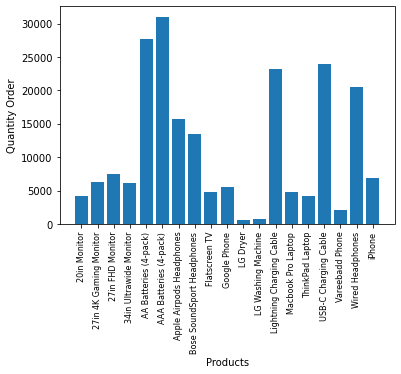

In [19]:
product_group=all_data.groupby('Product')

quantity_ordered=product_group.sum()['Quantity Ordered']

products=[product for product,df in product_group ]

plt.bar(products,quantity_ordered)

plt.xticks(products,rotation='vertical',size=8)

plt.xlabel('Products')
plt.ylabel("Quantity Order")

plt.show()


C:\Users\ketul\AppData\Local\Temp\ipykernel_15760\777564912.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


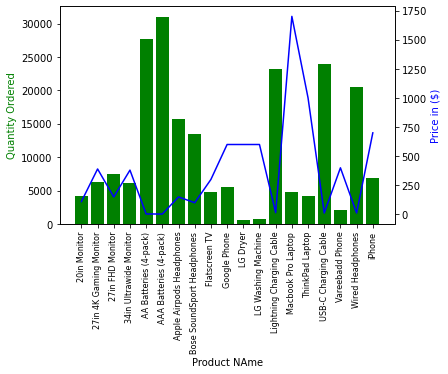

In [20]:
prices=all_data.groupby("Product").mean()['Price Each']

fig,ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices, 'b-')

ax1.set_xlabel("Product NAme")
ax1.set_ylabel("Quantity Ordered",color='g')
ax2.set_ylabel("Price in ($)",color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)

plt.show()

In [21]:
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64
